## IMPORT statements

In [3]:
import sys
print(sys.version)
import numpy as np
print("Numpy version:", np.__version__)
import pandas as pd
print("Pandas version:", pd.__version__)
import matplotlib.pyplot as plt
#specific to jupyter notebook
%matplotlib inline

3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy version: 1.10.1
Pandas version: 0.17.1


## Read csv file and take a short look at it

Note that the file I have used here is the filtered data before we discussed adding more columns.  The filename could be changed, and as long as the new filename represents a version of the same data with at least the same columns as are in this version, all of this code should work exactly the same.

In [4]:
flight_data = pd.read_csv('Flight_Data_Filtered.csv')
flight_data.head()
# look_at.tail(5)
# look_at.size
# look_at.count()
# over 400K rows for each month!
# look_at.index

Year  Month UniqueCarrier  OriginAirportID Origin     OriginCityName  \
0  2015      7            AA            14771    SFO  San Francisco, CA   
1  2015      7            AA            14771    SFO  San Francisco, CA   
2  2015      7            AA            14771    SFO  San Francisco, CA   
3  2015      7            AA            14771    SFO  San Francisco, CA   
4  2015      7            AA            14771    SFO  San Francisco, CA   

  OriginStateName  OriginCityMarketID  DestAirportID Dest  \
0      California               32457          11298  DFW   
1      California               32457          11298  DFW   
2      California               32457          11298  DFW   
3      California               32457          11298  DFW   
4      California               32457          11298  DFW   

            DestCityName DestStateName  DestCityMarketID  ArrDelay  \
0  Dallas/Fort Worth, TX         Texas             30194       -18   
1  Dallas/Fort Worth, TX         Texas             30194       -22   
2  Dallas/Fort Worth, TX         Texas             30194        -6   
3  Dallas/Fort Worth, TX         Texas             30194       -21   
4  Dallas/Fort Worth, TX         Texas             30194       -11   

   ArrDelayMinutes  ArrDel15  
0                0         0  
1                0         0  
2                0         0  
3                0         0  
4                0         0

This is what we created for the proposal.  Since we turned it in, I changed the code to fix the labels, but the content is the same.  

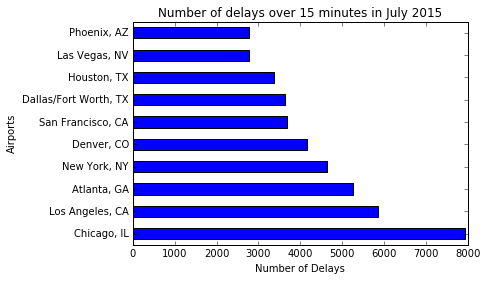

In [37]:
flight_data["ArrDel15"].groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015') \
                                   .set(xlabel="Number of Delays", ylabel="Airports")


plt.savefig('graph1.png')

Below is the analysis again, normalized to show the ratio of arrival delays to overall flights per airport.

@John:  this is one of two graphs it would be great to have confirmed in Tableau

[<matplotlib.text.Text at 0x10b3caf60>, <matplotlib.text.Text at 0x109eb72b0>]

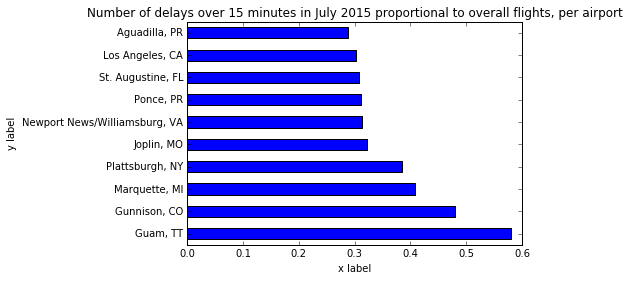

In [38]:
flight_data.ArrDel15.groupby(flight_data.DestCityName) \
                                   .sum() \
                                   .div(flight_data.DestCityName.value_counts()) \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Number of delays over 15 minutes in July 2015 proportional to '
                                         'overall flights, per airport') \
                                   .set(xlabel="x label", ylabel="y label")

This graph was also in the proposal.

Below is a graph of the total minutes of delays per airport, for the 10 airports with the highest total minutes of delays.

In [107]:
arr_delay = flight_data["ArrDelayMinutes"]
arr_delay.groupby(flight_data["DestCityName"]) \
                                   .sum() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh') 
                
plt.savefig('graph2.png')

Below is the average delay per airport (no proportional values regarding total minutes of delay)

@John: this is the second graph for which it would be awesome to have confirmation from Tableau

In [34]:
flight_data.ArrDelayMinutes.groupby(flight_data.DestCityName) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay') \
                                   .set(xlabel="x label", ylabel="y label")

[<matplotlib.text.Text at 0x108dc7908>, <matplotlib.text.Text at 0x108d8ccf8>]

Average delay by Unique Carrier (this is the above data with the only change being in the groupby argument)

[<matplotlib.text.Text at 0x105d19630>, <matplotlib.text.Text at 0x108dc7cc0>]

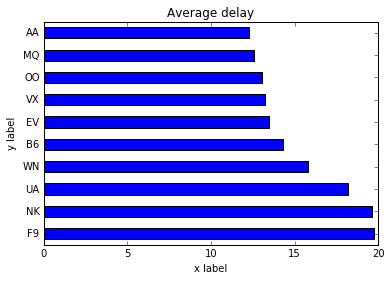

In [35]:
flight_data.ArrDelayMinutes.groupby(flight_data.UniqueCarrier) \
                                   .mean() \
                                   .sort_values(ascending = False) \
                                   .head(10) \
                                   .plot(kind = 'barh', title='Average delay') \
                                   .set(xlabel="x label", ylabel="y label")